IMPORT LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

DATA PREPROCESSING

In [5]:
data = pd.read_csv('datasets_house_prices.csv')

CHECKING FOR MISSING VALUES

In [6]:
print(data.isnull().sum())

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


NORMALIZING FEATURES

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(data[['Size (sqft)', 'Bedrooms', 'Age']])
y = data['Price']

MODE IMPLEMENTATION

In [8]:
def linear_regression(X, y):
    X = np.c_[np.ones(len(X)), X]
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y
    return theta[0], theta[1:]

def predict(X, theta0, theta):
    return theta0 + X @ theta

MODEL TRAIN

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
theta0, theta = linear_regression(X_train, y_train)

In [11]:
y_train_pred = predict(X_train, theta0, theta)
mse_train = np.mean((y_train - y_train_pred) ** 2)
print(f'Training MSE: {mse_train:.2f}')

Training MSE: 170277648.52


MODEL EVALUATION

In [12]:
y_test_pred = predict(X_test, theta0, theta)
mse_test = np.mean((y_test - y_test_pred) ** 2)
print(f'Testing MSE: {mse_test:.2f}')

Testing MSE: 167882080.37


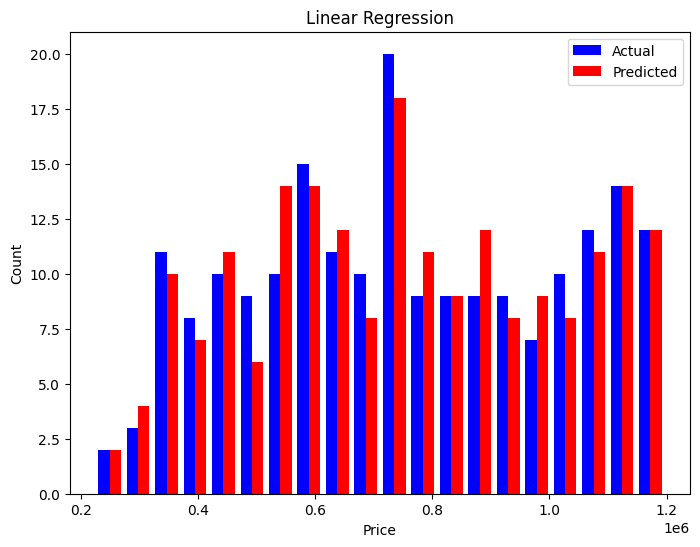

In [13]:
plt.figure(figsize=(8, 6))
plt.hist([y_test, y_test_pred], bins=20, color=['b', 'r'], label=['Actual', 'Predicted'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Linear Regression')
plt.legend()
plt.show()


In order to forecast property values based on characteristics like size, number of bedrooms, and age, we created a simple linear regression model from scratch using Python for this project. First, we handled the missing values in the dataset by putting it into a Pandas DataFrame and using StandardScaler to normalize the data.

Using the least squares method, we manually determined the model's slope and intercept instead of using libraries like scikit-learn. Next, using the input features as a guide, we created a function to forecast home prices.

After dividing the data into training and testing sets, we trained the model and evaluated its effectiveness by calculating the Mean Squared Error (MSE) for each set. In order to visualize the regression line with the test data points, we finally made a plot.
